#### Problem statement:
 - Company wants to understand the factors affecting the demand for these shared bikes in the American market.
 - The company wnats to know:
 
   - Which variables are significant in predicting the demand for shared bikes.
   - How well those variables describe the bike demands

In [1]:
# Importing necessary libraries and adding new libraries as and when required

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

import warnings
warnings.filterwarnings('ignore')

### Reading and understanding the data set

In [3]:
# Lets import the bike sharing data set

In [5]:
df = pd.read_csv('day.csv')

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [8]:
df.shape

(730, 16)

In [9]:
# There are total 730 rows and 16 columns in the data set

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
## There is no column with null value hence no need of dealing with null values

In [13]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [14]:
## Looks like there are no outliers present in the data set

#### Lets look at the important and relevent columns from the data set

In [15]:
# Dropping instant column as it represents the serial no of rows.

In [16]:
df = df.drop('instant', axis = 1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
## We can drop the 'dteday' column as 'yr' and 'mnth' column are already existing
## Also 'casual' & 'registered' count column can be dropped as 'cnt' column explains both.(cn = casual + registered)  

In [18]:
df = df.drop(['dteday','casual','registered'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
## Column 'atemp' is the feeling temperature which is just an intuition whereas 'temp' is the actual measure by a machine.
## Hence dropping 'atemp' column

In [20]:
df = df.drop('atemp', axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [21]:
## Checking categorical and numerical columns

In [22]:
df.season.unique() # Nominal categorical

array([1, 2, 3, 4], dtype=int64)

In [23]:
df.mnth.unique()  # Nominal categorical

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [24]:
df.weekday.unique() # Nominal categorical

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [25]:
df.weathersit.unique() # Nominal categorical

array([2, 1, 3], dtype=int64)

In [26]:
df.workingday.unique() # Binary

array([1, 0], dtype=int64)

In [27]:
df.holiday.unique() # Binary

array([0, 1], dtype=int64)

In [28]:
df.yr.unique() # Binary

array([0, 1], dtype=int64)

#### Visualising the data

In [29]:
## Lets make a pairplot of numerical variables

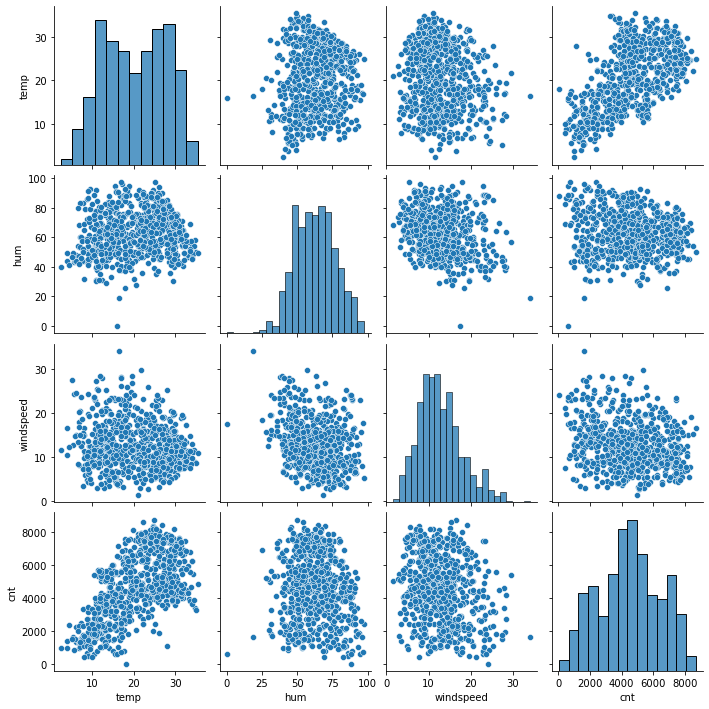

In [30]:
sns.pairplot(df[['temp','hum','windspeed','cnt']])
plt.show()

In [31]:
## From the scatter plots we can see that 'cnt' variable is following a linear relation with 'temp'
## Humidity and windspeed wrt cnt are not following any linear pattern. 

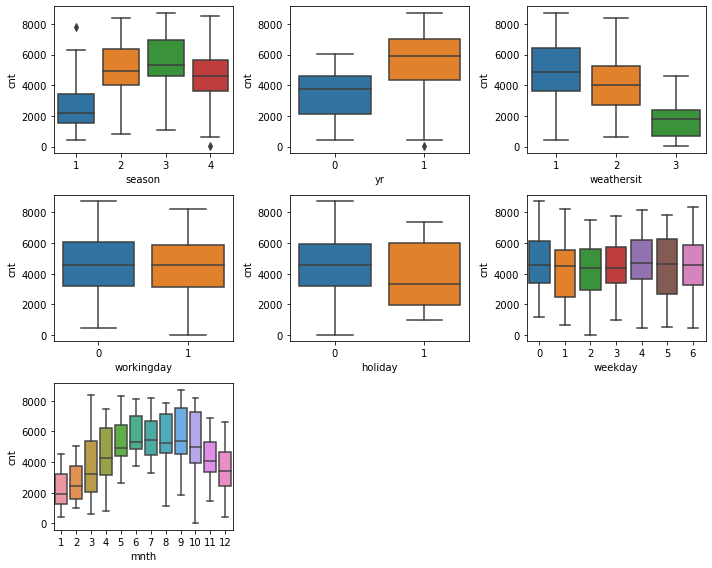

In [32]:
plt.figure(figsize = (10,8))
plt.subplot(3,3,1,)
sns.boxplot(x = 'season',y='cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr',y='cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit',y='cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday',y='cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday',y='cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday',y='cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth',y='cnt', data = df)
plt.tight_layout()
plt.show()

In [33]:
## Looks like during summer and fall season the number of rental bikes were more.
## Observing the median of year 2019 it is pretty high than the year 2018 the demand thus increased.
## An obvious scenario can be seen in the weather situation during rain, thunderstrom people would avoid use of bikes thus
# the median lies lower as compared to other situations. And no rental on heavy rain 
## On workdays or on holidays a similar kind of distribution is observed.
## Rental demand increases between the month June and October.

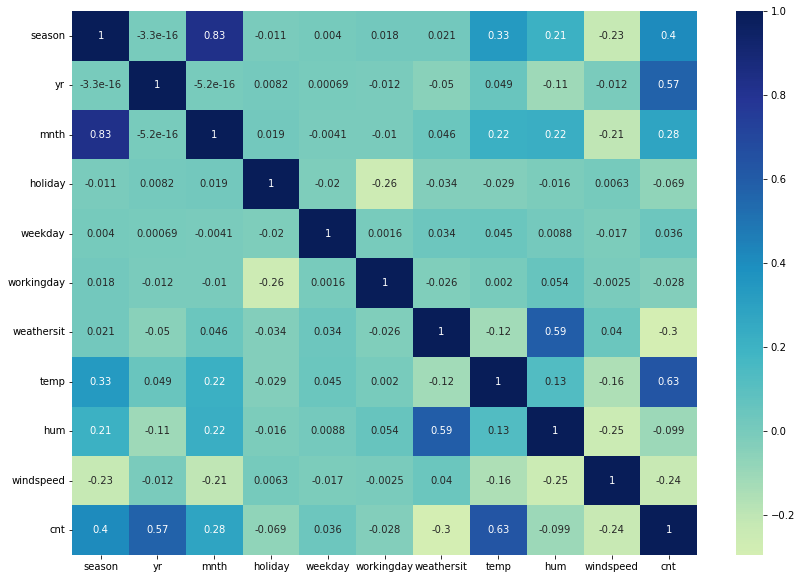

In [34]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot= True, cmap = 'YlGnBu', center = 0.18)
plt.show()

In [35]:
## There is pretty high correltion between year & temp with count variable.
## Also month and season has high correlation
## A negative correlation of cnt can be seen with holiday, workingday, weathersit, hum & windspeed 

#### Preparing the data for modelling 
 - Binary vars are already converted into 0/1 
 - Nominal categorical vars shall be converted to dummy 

In [36]:
## Converting season column

In [37]:
season_dummy = pd.get_dummies(df['season'],drop_first= True)
season_dummy.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [38]:
season_dummy.rename(columns = {2:'summer_season', 3:'fall_season',4:'winter_season'},inplace = True)
season_dummy.head()

,summer_season,fall_season,winter_season
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [39]:
df = pd.concat([df,season_dummy], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,0,0,0
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,0,0,0
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,0,0,0


In [40]:
df = df.drop('season', axis = 1)
df.head(2)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season
0,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,0,0,0
1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,0,0,0


In [41]:
## Converting weather_situation column

In [42]:
weather_situation = pd.get_dummies(df['weathersit'],drop_first= True)
weather_situation.head(2)

,2,3
0,1,0
1,1,0


In [43]:
weather_situation.rename(columns = {2:'cloudy', 3:'light_snow'}, inplace = True)
weather_situation.head(2)

,cloudy,light_snow
0,1,0
1,1,0


In [44]:
df = pd.concat([df,weather_situation], axis = 1)
df.head(2)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season,cloudy,light_snow
0,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,0,0,0,1,0


In [45]:
df = df.drop('weathersit', axis = 1)
df.head(2)

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season,cloudy,light_snow
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,0,0,0,1,0


In [46]:
## Weekday

In [47]:
weekday_dummy = pd.get_dummies(df['weekday'],drop_first= True)
weekday_dummy.head(2)

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0


In [48]:
weekday_dummy.rename(columns = {1:'Mon', 2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',7:'Sun'}, inplace = True)
weekday_dummy.head(2)

,Mon,Tue,Wed,Thur,Fri,Sat
0,1,0,0,0,0,0
1,0,1,0,0,0,0


In [49]:
df = pd.concat([df,weekday_dummy], axis = 1)
df.head(2)

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season,cloudy,light_snow,Mon,Tue,Wed,Thur,Fri,Sat
0,0,1,0,1,1,14.110847,80.5833,10.749882,985,0,0,0,1,0,1,0,0,0,0,0
1,0,1,0,2,1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,1,0,0,0,0


In [50]:
df = df.drop('weekday', axis = 1)
df.head(2)

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season,cloudy,light_snow,Mon,Tue,Wed,Thur,Fri,Sat
0,0,1,0,1,14.110847,80.5833,10.749882,985,0,0,0,1,0,1,0,0,0,0,0
1,0,1,0,1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,1,0,0,0,0


In [51]:
months = pd.get_dummies(df['mnth'],drop_first= True)
months.rename(columns = {2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}, inplace = True)
df.head(2)

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season,cloudy,light_snow,Mon,Tue,Wed,Thur,Fri,Sat
0,0,1,0,1,14.110847,80.5833,10.749882,985,0,0,0,1,0,1,0,0,0,0,0
1,0,1,0,1,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,1,0,0,0,0


In [52]:
df = pd.concat([df,months], axis = 1)

In [53]:
df = df.drop('mnth', axis = 1)
df.head(2)

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season,...,Mar,Apr,May,June,Jul,Aug,Sept,Oct,Nov,Dec
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape

(730, 29)

In [55]:
## Finally we have 30 columns in the data set and 730 rows.

### Splitting into train and test

In [57]:
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling of features

In [58]:
# Initiate an object
scaler = MinMaxScaler()

# Create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']

# Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [59]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the modeling 

In [60]:
y_train = df_train.pop('cnt')
X_train = df_train

In [61]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


### Building the linear regression model

### Using RFE - Recursive feature elimination let us eliminate few features

In [62]:
## Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
## Running RFE to select 13 features 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)
rfe = rfe.fit(X_train,y_train)

In [64]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer_season', True, 1),
 ('fall_season', True, 1),
 ('winter_season', True, 1),
 ('cloudy', True, 1),
 ('light_snow', True, 1),
 ('Mon', False, 10),
 ('Tue', False, 11),
 ('Wed', False, 9),
 ('Thur', False, 7),
 ('Fri', False, 8),
 ('Sat', False, 16),
 ('Feb', False, 12),
 ('Mar', False, 2),
 ('Apr', False, 5),
 ('May', False, 3),
 ('June', False, 4),
 ('Jul', False, 13),
 ('Aug', True, 1),
 ('Sept', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 14),
 ('Dec', False, 15)]

In [65]:
## Features that are required to be considered
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer_season',
       'fall_season', 'winter_season', 'cloudy', 'light_snow', 'Aug', 'Sept',
       'Oct'],
      dtype='object')

In [66]:
## Eliminated columns list
X_train.columns[~rfe.support_]

Index(['workingday', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Feb', 'Mar',
       'Apr', 'May', 'June', 'Jul', 'Nov', 'Dec'],
      dtype='object')

### Building the model using statsmodel for the detailed stats

In [67]:
## Importing statsmodel.api 
import statsmodels.api as sm

In [68]:
## Creating X_test dataframe with RFE selected features
X_train_rfe = X_train[col]

In [69]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [70]:
## Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [71]:
# Lets check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.07e-189
Time:                        11:03:53   Log-Likelihood:                 510.77
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2397      0.027      8.867

In [72]:
## Here we can see that the R2 value is around 82% that means the model is really good, but looking into the p-value of
## May month i.e. 7.3% reminds that the value is higher than 5% 

### Let us also check the VIF (Variance Inflation Factor) to eliminate the features

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
X_train_rfe = X_train_rfe.drop(['const'], axis =1)

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,23.86
3,hum,15.32
6,fall_season,8.18
4,windspeed,3.65
5,summer_season,3.46
7,winter_season,2.85
8,cloudy,2.15
0,yr,2.03
10,Aug,1.85
12,Oct,1.62


In [76]:
## The VIF value of temp, hum & fall_season are high

In [77]:
# Dropping May month column as it has high p-value and less significance

In [79]:
X_train_new = X_train_rfe.drop(['fall_season'], axis=1)

In [80]:
# Add constant
X_train_new = sm.add_constant(X_train_new)

# create the model and fit
lm = sm.OLS(y_train, X_train_new).fit()

# check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.49e-190
Time:                        11:06:13   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2390      0.027      8.838

In [81]:
## Dropping the feature has not made any change in the R2 value.
## There are negative relation of cnt variable with holiday, humidity, windspeed, light_snow
## The p-value of fall_season and Aug month are bit higher but below 5% so no need of dropping them.

In [82]:
## Lets check the VIF as well

In [83]:
X_train_new = X_train_new.drop(['const'],axis = 1)

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,winter_season,2.25
7,cloudy,2.13
0,yr,2.02
5,summer_season,1.84
9,Aug,1.60
11,Oct,1.60
10,Sept,1.34


In [85]:
## VIF value seems to be fine in all the cases except for temp, hum and fall_season

In [86]:
## Dropping 'temp' column
X_train_new1 = X_train_new.drop(['Oct'], axis=1)

In [87]:
# Add constant
X_train_new1 = sm.add_constant(X_train_new1)

# create the model and fit
lm = sm.OLS(y_train, X_train_new1).fit()

# check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          7.50e-191
Time:                        11:07:23   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2322      0.027      8.623

In [88]:
## P-values of Aug month column 12.2% and shall be dropped

In [89]:
## Checking VIF value

In [90]:
X_train_new1 = X_train_new1.drop(['const'],axis = 1)

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train_new1.columns
vif['VIF'] = [variance_inflation_factor(X_train_new1.values,i) for i in range(X_train_new1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,14.31
2,temp,9.66
4,windspeed,3.59
7,cloudy,2.13
0,yr,2.01
5,summer_season,1.83
6,winter_season,1.75
9,Aug,1.59
10,Sept,1.31
8,light_snow,1.16


In [92]:
## VIF value of hum is high

In [93]:
## Dropping 'Aug' column
X_train_new2 = X_train_new1.drop(['hum'], axis=1)

In [94]:
# Add constant
X_train_new2 = sm.add_constant(X_train_new2)

# create the model and fit
lm = sm.OLS(y_train, X_train_new2).fit()

# check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          2.62e-187
Time:                        11:07:56   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1307      0.017      7.837

In [95]:
X_train_new2 = X_train_new2.drop(['const'],axis = 1)

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train_new2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new2.values,i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer_season,1.82
8,Aug,1.58
6,cloudy,1.49
5,winter_season,1.48
9,Sept,1.31
7,light_snow,1.08
1,holiday,1.04


In [97]:
## After multiple iterations R2 value of 83.4 is achieved from the model.

### Residual Analysis

In [98]:
X_train_new2 = sm.add_constant(X_train_new2)

In [99]:
y_train_pred = lm.predict(X_train_new2)

In [100]:
res = y_train - y_train_pred

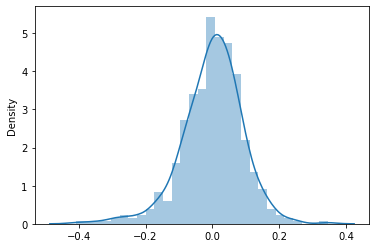

In [101]:
sns.distplot(res)
plt.show()

In [102]:
## The error distribution is centered around the zero

### Prediction and evaluation on the test set

In [103]:
# Create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [104]:
df_test.head(2)

,yr,holiday,workingday,temp,hum,windspeed,cnt,summer_season,fall_season,winter_season,...,Mar,Apr,May,June,Jul,Aug,Sept,Oct,Nov,Dec
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Dividing X_test & y_test 

In [105]:
y_test = df_test.pop('cnt')
X_test = df_test

In [106]:
X_train_new2 = X_train_new2.drop('const', axis=1)

In [107]:
# Creating X_test_new considering final acceptable features
X_test_new = X_test[X_train_new2.columns]

#Adding constant
X_test_new = sm.add_constant(X_test_new)

In [108]:
# making predictions
y_pred = lm.predict(X_test_new)

### Model evaluation

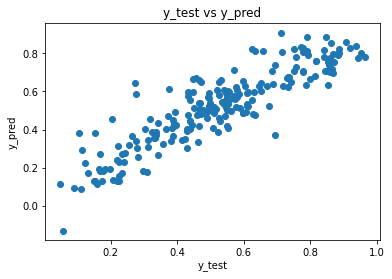

In [109]:
## Plotting y_test and y_pred to understand the spread
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.scatter(y_test, y_pred)
plt.show()

In [110]:
from sklearn.metrics import r2_score

In [113]:
r2_score(y_true = y_test, y_pred = y_pred)

0.7935224695104378

In [114]:
## A higher R2 value of the test data set explains that the created model is good enough. 